In [1]:
import numpy as np
import matplotlib.pyplot as plt

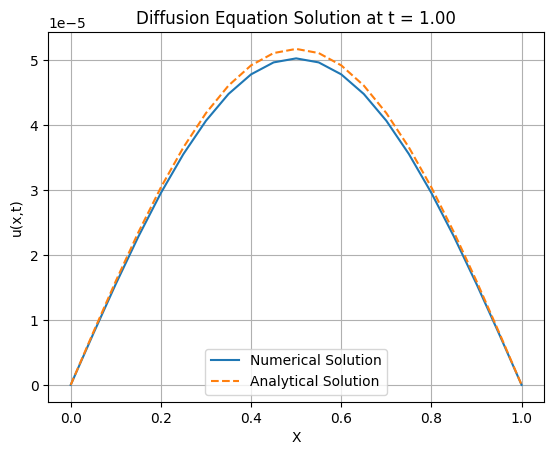

In [2]:
M = 20
N = 1000
dx = 1.0/M
dt = 1.0/N
lambda_ = dt/dx**2

if lambda_ > 0.5:
    print("Warning: Scheme may be unstable.")

x = np.linspace(0, 1, M+1)
u = np.sin(np.pi * x)
u[0] = u[-1] = 0

for i in range(N):
    u_new = u.copy()
    for j in range(1, M):
        u_new[j] = u[j] + lambda_* (u[j+1] - 2*u[j] + u[j-1])
    u = u_new

t_final = N*dt 
u_analytical = np.exp(-np.pi**2 * t_final) * np.sin(np.pi * x)
plt.plot(x, u, label="Numerical Solution")
plt.plot(x, u_analytical, label="Analytical Solution", linestyle="--")
plt.title(f"Diffusion Equation Solution at t = {t_final:.2f}")
plt.xlabel("X")
plt.ylabel("u(x,t)")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Compute max error at final time
max_error = np.max(np.abs(u - u_analytical))

# Print max error
print(f"Maximum error at t = {t_final:.2f}: {max_error:.6e}")

Maximum error at t = 1.00: 1.455747e-06


In [ ]:
u_all = np.zeros((N+1, M+1))  # store full solution: rows = time, cols = space
u_all[0, :] = np.sin(np.pi * x)  # initial condition
u_all[0, 0] = u_all[0, -1] = 0   # enforce boundary



In [5]:
for n in range(N):
    u_new = u_all[n, :].copy()
    for j in range(1, M):
        u_new[j] = u_all[n, j] + lambda_ * (u_all[n, j+1] - 2*u_all[n, j] + u_all[n, j-1])
    u_new[0] = u_new[-1] = 0  # enforce boundary
    u_all[n+1, :] = u_new

In [6]:
u_exact_all = np.zeros_like(u_all)
for n in range(N+1):
    t_n = n * dt
    u_exact_all[n, :] = np.exp(-np.pi**2 * t_n) * np.sin(np.pi * x)

In [7]:
error_array = np.abs(u_all - u_exact_all)
max_error_overall = np.max(error_array)
l2_error_overall = np.sqrt(np.sum(error_array**2) * dx * dt)

print(f"Max error over all (x,t): {max_error_overall:.6e}")

Max error over all (x,t): 1.062582e-03
